# Intermediate Python Lesson 2: Modularization and Documentation

Now that we've covered some of the basic syntax and libraries in Python we can start to tackle our data analysis problem.
We are interested in understanding the relationship between the weather and the number of mosquitos so that we can plan mosquito control measures.
Since we want to apply these mosquito control measures at a number of different sites we need to understand how the relationship varies across sites.
Remember that we have a series of CSV files with each file containing the data for a single location.

## Learning Objectives

* Write code for people, not computers
* Break a program into chunks
* Write and use functions in Python
* Write useful documentation

## Starting small


When approaching computational tasks like this one it is typically best to start small,
check each piece of code as you go,
and make incremental changes.
This helps avoid marathon debugging sessions
because it's much easier to debug one small piece of the code at a time than to write 100 lines of code and
then try to figure out all of the different bugs in it.

Let's start by reading in the data from a single file and conducting a simple regression analysis on it.
In fact, I would actually start by just importing the data and making sure that everything is coming in OK.

In [2]:
import pandas as pd

d = pd.read_csv('data/A2_mosquito_data.csv')
d

year  temperature  rainfall  mosquitos
0   1960           82       200        180
1   1961           70       227        194
2   1962           89       231        207
3   1963           74       114        121
4   1964           78       147        140
5   1965           85       151        148
6   1966           86       172        162
7   1967           75       106        112
8   1968           70       276        230
9   1969           86       165        162
10  1970           83       222        198
11  1971           78       297        247
12  1972           87       288        248
13  1973           76       286        239
14  1974           86       231        202
15  1975           90       284        243
16  1976           76       190        175
17  1977           87       257        225
18  1978           88       128        133
19  1979           87       218        199
20  1980           81       206        184
21  1981           74       175        160
22  1982           85       202        187
23  1983           71       130        126
24  1984           80       225        200
25  1985           72       196        173
26  1986           76       261        222
27  1987           85       111        121
28  1988           83       247        210
29  1989           86       137        142
30  1990           82       159        152
31  1991           77       172        160
32  1992           74       280        231
33  1993           70       291        238
34  1994           77       126        125
35  1995           89       191        178
36  1996           83       298        248
37  1997           80       282        237
38  1998           86       219        195
39  1999           72       143        134
40  2000           79       262        221
41  2001           85       189        175
42  2002           86       205        186
43  2003           72       195        173
44  2004           78       148        146
45  2005           71       262        219
46  2006           88       255        226
47  2007           79       262        221
48  2008           73       198        176
49  2009           86       215        187
50  2010           87       127        129

The import seems to be working properly, so that's good news,
but does anyone have anyone see anything about the code that they don't like?

That's right.
The variable name I've chosen for the data doesn't really communicate any information to anyone about what it's holding,
which means that when I come back to my code next month to change something I'm going to have a more difficult time understanding what the code is actually doing.
This brings us to one of our first major lessons for the morning,
which is that in order to understand what our code is doing so that we can quickly make changes in the future,
we need to *write code for people, not computers*,
and an important first step is to *use meaningful varible names*.

In [4]:
import pandas as pd

data = pd.read_csv('data/A2_mosquito_data.csv')
data.head()

year  temperature  rainfall  mosquitos
0  1960           82       200        180
1  1961           70       227        194
2  1962           89       231        207
3  1963           74       114        121
4  1964           78       147        140

The `.head()` method lets us just look at the first few rows of the data.
A method is a function attached to an object that operates on that object.
So in this case we can think of it as being equivalent to `head(data)`.

Everything looks good,
but either global warming has gotten *really* out of control or the temperatures are in degrees Fahrenheit.
Let's convert them to Celsius before we get started.

We don't need to reimport the data in our new cell because all of the executed cells in IPython Notebook share the same workspace.
However, it's worth noting that if we close the notebook and then open it again it is necessary to rerun all of the individual blocks of code that a code block relies on before continuing.
To rerun all of the cells in a notebook you can select `Cell -> Run All` from the menu.

In [5]:
data['temperature'] = (data['temperature'] - 32) * 5 / 9.0
data.head()

year  temperature  rainfall  mosquitos
0  1960    27.777778       200        180
1  1961    21.111111       227        194
2  1962    31.666667       231        207
3  1963    23.333333       114        121
4  1964    25.555556       147        140

That's better.
Now let's go ahead and conduct a regression on the data.
We'll use the `statsmodels` library to conduct the regression.

In [7]:
import statsmodels.api as sm

regr_results = sm.OLS.from_formula('mosquitos ~ temperature + rainfall', data).fit()
regr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              mosquitos   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     7889.
Date:                Wed, 13 May 2015   Prob (F-statistic):           3.68e-61
Time:                        16:47:30   Log-Likelihood:                -111.54
No. Observations:                  51   AIC:                             229.1
Df Residuals:                      48   BIC:                             234.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      17.5457      2.767      6.341      0.000        11.983    23.109
temperature     0.8719      0.092      9.457      0.000         0.687     1.057
rainfall        0.6967      0.006    125.385      0.000         0.686     0.708
==============================================================================
Omnibus:                        1.651   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                0.906
Skew:                          -0.278   Prob(JB):                        0.636
Kurtosis:                       3.343   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As you can see `statsmodels` lets us use the names of the columns in our dataframe
to clearly specify the form of the statistical model we want to fit.
This also makes the code more readable since the model we are fitting is written in a nice,
human readable, manner.
The `summary` method gives us a visual representation of the results.
This summary is nice to look at, but it isn't really useful for doing more computation,
so we can look up particular values related to the regression using the `regr_results` attributes.
These are variables that are attached to `regr_results`.

In [11]:
regr_results.params

Intercept      17.545739
temperature     0.871943
rainfall        0.696717
dtype: float64

In [12]:
regr_results.rsquared

0.99696687369130499

If we want to hold onto these values for later we can assign them to variables:

In [13]:
parameters = regr_results.params
rsquared = regr_results.rsquared

And then we can plot the observed data against the values predicted by our regression to visualize the results.
First, remember to tell the notebook that we want our plots to appear in the notebook itself.

In [14]:
%matplotlib inline

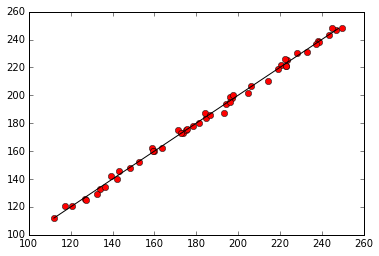

In [15]:
import matplotlib.pyplot as plt

predicted = parameters[0] + parameters[1] * data['temperature'] + parameters[2] * data['rainfall']
plt.plot(predicted, data['mosquitos'], 'ro')
min_mosquitos, max_mosquitos = min(data['mosquitos']), max(data['mosquitos'])
plt.plot([min_mosquitos, max_mosquitos], [min_mosquitos, max_mosquitos], 'k-')

OK, great.
So putting this all together we now have a piece of code that imports the modules we need,
loads the data into memory, fits a regression to the data,
and stores the parameters and fit of data.

Intercept      17.545739
temperature     0.871943
rainfall        0.696717
dtype: float64
R^2 =  0.996966873691


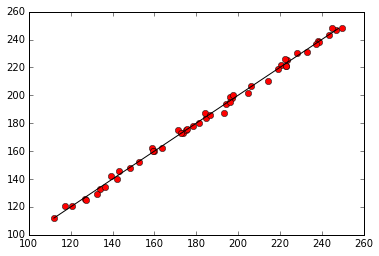

In [17]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_csv('data/A2_mosquito_data.csv')
data['temperature'] = (data['temperature'] - 32) * 5 / 9.0
regr_results = sm.OLS.from_formula('mosquitos ~ temperature + rainfall', data).fit()
parameters = regr_results.params
rsquared = regr_results.rsquared
predicted = parameters[0] + parameters[1] * data['temperature'] + parameters[2] * data['rainfall']
plt.plot(predicted, data['mosquitos'], 'ro')
min_mosquitos, max_mosquitos = min(data['mosquitos']), max(data['mosquitos'])
plt.plot([min_mosquitos, max_mosquitos], [min_mosquitos, max_mosquitos], 'k-')
print(parameters)
print("R^2 = ", rsquared)

## Functions


The next thing we need to do is loop over all of the possible data files,
but in order to do that we're going to need to grow our code some more.
Since our brain can only easily hold 5-7 pieces of information at once,
and our code already has more than that many pieces,
we need to start breaking our code into manageable sized chunks.
This will let us read and understand the code more easily and make it easier to reuse pieces of our code.
We'll do this using functions.

Functions in Python take the general form

```python
def function_name(inputs):
    do stuff
    return output
```

So, if we want to write a function that returns the value of a number squared we could use:

In [18]:
def square(x):
    x_squared = x ** 2
    return x_squared

print("Four squared is", square(4))
print("Five squared is", square(5))

Four squared is 16
Five squared is 25


We can also just return the desired value directly.

In [19]:
def square(x):
    return x ** 2

square(3)

9

And remember, if we want to use the result of the function later we need to store it somewhere.

In [20]:
two_squared = square(2)
two_squared

4

## Challenges
 
> 1. Write a function that converts temperature from Fahrenheit to
>    Celsius and use it to replace this line of code:
> 
>    ```python
>    data['temperature'] = (data['temperature'] - 32) * 5 / 9.0
>    ```
> 
> 2. Write a function called `analyze()` that takes `data` as an
>    input, performs the regression, makes the observed-predicted
>    plot, and returns `parameters`.
> 
> *Walk through someone's result.
> When discussing talk about different names.
> E.g., fahr_to_celsius is better than temp_to_celsius since it is
> explicit both the input and the output.
> Talk about the fact that even though this doesn't save us any lines
> of code it's still easier to read.*

## The call stack


Let's take a closer look at what happens when we call a function. To make things clearer, we'll start by putting the initial value 32 in a variable and store the final result in one as well:

In [1]:
# Don't worry if this fails
%load_ext tutormagic

In [4]:
%%tutor --lang python3
# Uncomment ^ that line if the previous cell ran OK
def celsius_to_kelvin(tempC):
    tempK = tempC + 273.15
    return tempK

original = 32.0
final = celsius_to_kelvin(original)

#### Call Stack (Initial State)

When the first three lines of this function are executed the function is created,
but nothing happens.
The function is like a recipe,
it contains the information about how to do something,
but it doesn't do so until you explicitly ask it to.
We then create the variable `original` and assign the value 32.0 to it.
The values `tempC` and `tempK` don't currently exist. 

#### Call Stack Immediately After Function Call

When we call `celsius_to_kelvin`,
Python creates another stack frame to hold the function's variables.
Upon creation this stack frame only includes the inputs being passed to the function,
so in our case `tempC`.
As the function is executed variables created by the function are stored in the functions stack frame,
so `tempC` is created in the `celsius_to_kelvin` stack frame.

#### Call Stack At End Of Function Call

When the call to `celsius_to_kelvin` returns a value,
Python throws away `celsius_to_kelvin`'s stack frame,
including all of the variables it contains,
and creates a new variable
in the original stack frame to hold the temperature in Celsius.

#### Call Stack After End

This global stack frame is always there;
it holds the variables we defined outside the functions in our code.
What it doesn't hold is the variables that were in the other stack frames.
If we try to get the value of `tempC` or `tempK` after our functions have finished running,
Python tells us that there's no such thing:

In [5]:
print(tempK)

NameError: name 'tempK' is not defined

The reason for this is encapsulation,
and it's one of the key to writing correct, comprehensible programs.
A function's job is to turn several operations into one so that we can think about
a single function call instead of a dozen or a hundred statements each time we want to do something.
That only works if functions don't interfere with each other by potentially changing the same variables;
if they do, we have to pay attention to the details once again,
which quickly overloads our short-term memory.

## Testing Functions


Once we start putting things into functions so that we can re-use them,
we need to start testing that those functions are working correctly.
The most basic thing we can do is some informal testing to make sure the function is doing what it is supposed to do.
To see how to do this, let's write a function to center the values in a dataset prior to conducting statistical analysis. 
Centering means setting the mean of each variable to be the same value, typically zero.

In [22]:
def center(data):
    return data - data.mean()

We could test this on our actual data,
but since we don't know what the values ought to be,
it will be hard to tell if the result was correct.
Instead, let's create a made up data frame where we know what the result should look like.

In [23]:
import pandas as pd

test_data = pd.DataFrame([[1, 1], [1, 2]])
test_data

0  1
0  1  1
1  1  2

Now that we've made some test data we need to figure out what we think the result should be
and we need to do this *before* we run the test.
This is important because we are biased to believe that any result we get back is correct,
and we want to avoid that bias.
This also helps make sure that we are confident in what we want the code to do.
So, what should the result of running `center(data)` be?

OK, let's go ahead and run the function.

In [24]:
center(test_data)

0    1
0  0 -0.5
1  0  0.5

That looks right,
so let's try `center` on our real data:

In [25]:
data = pd.read_csv('data/A2_mosquito_data.csv')
center(data)

year  temperature    rainfall  mosquitos
0    -25     1.607843   -7.039216  -5.235294
1    -24   -10.392157   19.960784   8.764706
2    -23     8.607843   23.960784  21.764706
3    -22    -6.392157  -93.039216 -64.235294
4    -21    -2.392157  -60.039216 -45.235294
5    -20     4.607843  -56.039216 -37.235294
6    -19     5.607843  -35.039216 -23.235294
7    -18    -5.392157 -101.039216 -73.235294
8    -17   -10.392157   68.960784  44.764706
9    -16     5.607843  -42.039216 -23.235294
10   -15     2.607843   14.960784  12.764706
11   -14    -2.392157   89.960784  61.764706
12   -13     6.607843   80.960784  62.764706
13   -12    -4.392157   78.960784  53.764706
14   -11     5.607843   23.960784  16.764706
15   -10     9.607843   76.960784  57.764706
16    -9    -4.392157  -17.039216 -10.235294
17    -8     6.607843   49.960784  39.764706
18    -7     7.607843  -79.039216 -52.235294
19    -6     6.607843   10.960784  13.764706
20    -5     0.607843   -1.039216  -1.235294
21    -4    -6.392157  -32.039216 -25.235294
22    -3     4.607843   -5.039216   1.764706
23    -2    -9.392157  -77.039216 -59.235294
24    -1    -0.392157   17.960784  14.764706
25     0    -8.392157  -11.039216 -12.235294
26     1    -4.392157   53.960784  36.764706
27     2     4.607843  -96.039216 -64.235294
28     3     2.607843   39.960784  24.764706
29     4     5.607843  -70.039216 -43.235294
30     5     1.607843  -48.039216 -33.235294
31     6    -3.392157  -35.039216 -25.235294
32     7    -6.392157   72.960784  45.764706
33     8   -10.392157   83.960784  52.764706
34     9    -3.392157  -81.039216 -60.235294
35    10     8.607843  -16.039216  -7.235294
36    11     2.607843   90.960784  62.764706
37    12    -0.392157   74.960784  51.764706
38    13     5.607843   11.960784   9.764706
39    14    -8.392157  -64.039216 -51.235294
40    15    -1.392157   54.960784  35.764706
41    16     4.607843  -18.039216 -10.235294
42    17     5.607843   -2.039216   0.764706
43    18    -8.392157  -12.039216 -12.235294
44    19    -2.392157  -59.039216 -39.235294
45    20    -9.392157   54.960784  33.764706
46    21     7.607843   47.960784  40.764706
47    22    -1.392157   54.960784  35.764706
48    23    -7.392157   -9.039216  -9.235294
49    24     5.607843    7.960784   1.764706
50    25     6.607843  -80.039216 -56.235294

It's hard to tell from the default output whether the result is correct,
but there are a few simple tests that will reassure us:

In [26]:
print('original mean:')
print(data.mean())
centered = center(data)
print()
print('mean of centered data:')
print(centered.mean())

original mean:
year           1985.000000
temperature      80.392157
rainfall        207.039216
mosquitos       185.235294
dtype: float64

mean of centered data:
year           0.000000e+00
temperature    1.393221e-15
rainfall       6.687461e-15
mosquitos     -1.337492e-14
dtype: float64


The mean of the centered data is very close to zero;
it's not quite zero because of floating point precision issues.
We can even go further and check that the standard deviation hasn't changed
(which it shouldn't if we've just centered the data):

In [27]:
print('std dev before and after:')
print(data.std())
print()
print(centered.std())

std dev before and after:
year           14.866069
temperature     6.135400
rainfall       56.560396
mosquitos      39.531551
dtype: float64

year           14.866069
temperature     6.135400
rainfall       56.560396
mosquitos      39.531551
dtype: float64


The standard deviations look the same.
It's still possible that our function is wrong,
but it seems unlikely enough that we we're probably in good shape for now.

Testing is really important when writing scientific code.
If you haven't checked that your code works properly, you can't be confident in your results.
We'll talk more about testing tomorrow.

## Documentation


OK, the `center` function seems to be working fine.
Does anyone else see anything that's missing before we move on?

Yes, we should write some *documentation*
to remind ourselves later what it's for and how to use it.
This function may be fairly straightforward,
but in most cases it won't be so easy to remember exactly what a function is doing in a few months.
Just imagine looking at our `analyze` function a few months in the future
and trying to remember exactly what it was doing just based on the code.

The usual way to put documentation in code is to add *comments* like this:

In [28]:
# center(data): return a new DataFrame containing the original data centered around zero.
def center(data, desired):
    return data - data.mean()

There's a better way to do this in Python.
If the first thing in a function is a string that isn't assigned to a variable,
that string is attached to the function as its documentation:

In [29]:
def center(data, desired):
    """Return a new DataFrame containing the original data centered around zero."""
    return data - data.mean()

This is better because we can now ask Python's built-in help system to show us the documentation for the function.

In [30]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new DataFrame containing the original data centered around zero.



A string like this is called a *docstring*
and there are also automatic documentation generators that use these docstrings to produce documentation for users.
We use triple quotes because
it allows us to include multiple lines of text and because it is considered good Python style.

In [31]:
def center(data):
    """Return a new array containing the original data centered on zero
    
    Example:
    >>> import pandas
    >>> data = pandas.DataFrame([[0, 1], [0, 2])
    >>> center(data)
       0    1
    0  0 -0.5
    1  0  0.5

     
    """
    return data - data.mean()

help(center)

Help on function center in module __main__:

center(data)
    Return a new array containing the original data centered on zero
    
    Example:
    >>> import pandas
    >>> data = pandas.DataFrame([[0, 1], [0, 2])
    >>> center(data)
       0    1
    0  0 -0.5
    1  0  0.5



### Challenge


1. Test your temperature conversion function to make sure it's working
   (think about some temperatures that you easily know the conversion for).
2. Add documentation to both the temperature conversation function and the analysis function.

## Looping over files


So now our code looks something like this:

Intercept      17.545739
temperature     0.871943
rainfall        0.696717
dtype: float64


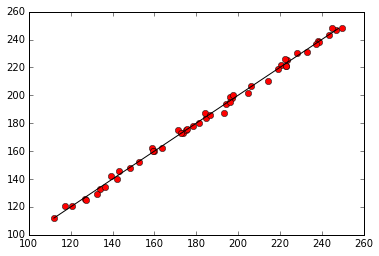

In [34]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def fahr_to_celsius(tempF):
    """Convert fahrenheit to celsius"""
    tempC = (tempF - 32) * 5 / 9.0
    return tempC

def analyze(data):
    """Perform regression analysis on mosquito data
    
    Takes a dataframe as input that includes columns named 'temperature',
    'rainfall', and 'mosquitos'.
    
    Performs a multiple regression to predict the number of mosquitos.
    Creates an observed-predicted plot of the result and
    returns the parameters of the regression.
    
    """
    regr_results = sm.OLS.from_formula('mosquitos ~ temperature + rainfall', data).fit()
    parameters = regr_results.params
    predicted = parameters[0] + parameters[1] * data['temperature'] + parameters[2] * data['rainfall']
    plt.figure()
    plt.plot(predicted, data['mosquitos'], 'ro')
    min_mosquitos, max_mosquitos = min(data['mosquitos']), max(data['mosquitos'])
    plt.plot([min_mosquitos, max_mosquitos], [min_mosquitos, max_mosquitos], 'k-')
    return parameters

data = pd.read_csv('data/A2_mosquito_data.csv')
data['temperature'] = fahr_to_celsius(data['temperature'])
regr_results = analyze(data)
print(regr_results)

Now we want to loop over all of the possible data files,
and to do that we need to know their names.
If we only had a dozen files we could write them all down,
but if we have hundreds of files or the filenames change then that won't really work.
Fortunately Python has a built in library to help us find the files we want to work with called `glob`.

In [36]:
import glob

filenames = glob.glob('data/*.csv')
filenames

['data/B2_mosquito_data.csv',
 'data/A2_mosquito_data.csv',
 'data/B1_mosquito_data.csv',
 'data/A3_mosquito_data.csv',
 'data/A1_mosquito_data.csv']

The object returned by `glob` is a list of strings.
A list is a Python data type that holds a group of potentially heterogenous values.
That means it can hold pretty much anything,
including functions.

In [37]:
mylist = [1, 'a', center]
mylist

[1, 'a', <function __main__.center>]

In this case all of the values are strings
that contain the names of all of the files that match the expression given to `glob`,
so in this case all of the files with the `.csv` extension.

Let's restrict the filenames a little more finely,
so that we don't accidentally get any data we don't want,
and print out the filenames one at a time.

In [38]:
filenames = glob.glob('data/*.csv')
for filename in filenames:
    print(filename)

data/B2_mosquito_data.csv
data/A2_mosquito_data.csv
data/B1_mosquito_data.csv
data/A3_mosquito_data.csv
data/A1_mosquito_data.csv


### Challenge


Modify your code to loop over all of the files in your directory,
making an observed-predicted plot for each file and printing the parameters.